In [1]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

pd.set_option('display.max_rows', 100, 'display.max_columns', 50)
plt.style.use('ggplot')

In [2]:
!ls data/*.csv

data/sample_submission.csv  data/test.csv  data/train.csv


In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
display(df_train.head())

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [5]:
display(df_test.head())

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [6]:
df_train.shape

(30000, 24)

In [7]:
df_test.shape

(20000, 23)

In [8]:
def cols_to_lower(columns):
    return ['_'.join(re.sub('[.-]', '', column).replace('(USD)', '').lower().strip().split()) for column in columns]

In [9]:
df_train.columns = cols_to_lower(df_train.columns)
df_test.columns = cols_to_lower(df_test.columns)

In [10]:
def unique_value_count(df):
    nunique_df = df.nunique().reset_index()
    nunique_df = nunique_df.rename(columns={'index': 'column', 0: 'num_unique'})
    return nunique_df

In [11]:
unique_value_count(df_train)

,column,num_unique
0,customer_id,30000
1,name,30000
2,gender,2
3,age,48
4,income,24429
5,income_stability,2
6,profession,8
7,type_of_employment,18
8,location,3
9,loan_amount_request,29982


In [12]:
def missing_value_stats(df):
    num_rows = df.shape[0]
    # Missing value count by columns
    df_missing = df.isna().sum().reset_index()
    # Renaming columns
    df_missing.columns = ['column', 'missing_values']
    # Getting only those columns having missing values > 0
    df_missing = df_missing[df_missing['missing_values'] > 0]
    df_missing.reset_index(drop=True, inplace=True)
    # Calculating percentage of missing
    df_missing['missing_percentage'] = df_missing['missing_values'].apply(
        lambda missing_value: round((missing_value / num_rows) * 100, 2)
    )
    
    if df_missing.shape[0] > 0:
        return df_missing
    else:
        return "No nulls in the data"

In [13]:
missing_value_stats(df_train)

,column,missing_values,missing_percentage
0,gender,53,0.18
1,income,4576,15.25
2,income_stability,1683,5.61
3,type_of_employment,7270,24.23
4,current_loan_expenses,172,0.57
5,dependents,2493,8.31
6,credit_score,1703,5.68
7,has_active_credit_card,1566,5.22
8,property_age,4850,16.17
9,property_location,356,1.19


In [14]:
df_train.head()

,customer_id,name,gender,age,income,income_stability,profession,type_of_employment,location,loan_amount_request,current_loan_expenses,expense_type_1,expense_type_2,dependents,credit_score,no_of_defaults,has_active_credit_card,property_id,property_age,property_type,property_location,coapplicant,property_price,loan_sanction_amount
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [15]:
df_train[['loan_sanction_amount']].describe()

,loan_sanction_amount
count,29660.000000
mean,47649.342208
std,48221.146686
min,-999.000000
25%,0.000000
50%,35209.395000
75%,74261.250000
max,481907.320000


### Questions

* What is the distribution of income for different income stability?
* Income distribution by location
* Is there any relation between income and the loan_amount_request?
* How many customer has active loans?
* Is the number of defaults affecting the sanctioned loan amount?
* Property location and property price


### Missing value imputation

* Property_location can easily be filled by using property location and property id


### Feature Generation

* Percentage of loan amount sanctioned as per the requested amount
* Boolean variable representing whether customer and property location is same or not

### Distribution of income by income stability

In [16]:
df_train['income_stability'].value_counts()

Low     25751
High     2566
Name: income_stability, dtype: int64

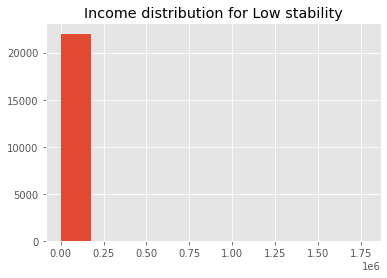

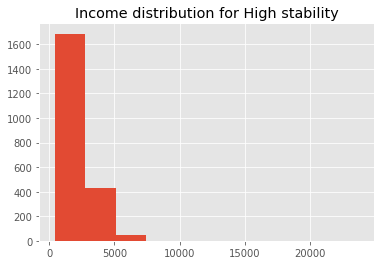

In [17]:
for income_stability in df_train['income_stability'].unique():
    if isinstance(income_stability, str):
        temp_df = df_train.loc[df_train['income_stability'] == income_stability, 'income']
        
        plt.hist(temp_df, bins=10)
        plt.title(f"Income distribution for {income_stability} stability")
        plt.show()

### Distribution of income by customer location

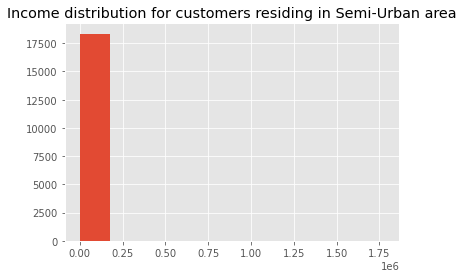

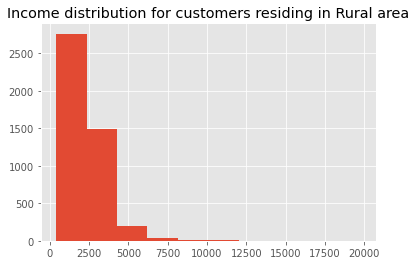

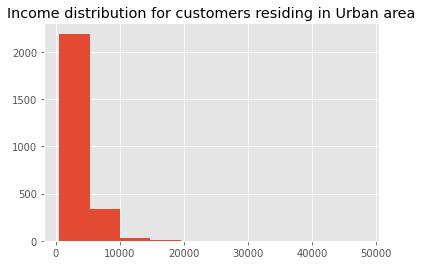

In [18]:
for location in df_train['location'].unique():
    if isinstance(location, str):
        temp_df = df_train.loc[df_train['location'] == location, 'income']
        
        plt.hist(temp_df)
        plt.title(f"Income distribution for customers residing in {location} area")
        plt.show()

### Is there any relation between the income and loan_amount_request?

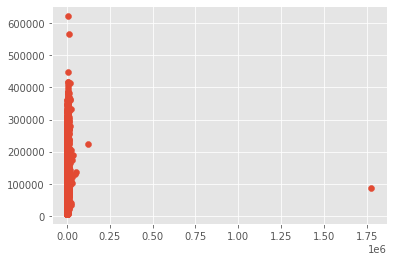

In [19]:
plt.scatter(df_train['income'], df_train['loan_amount_request'])
plt.show()

### Customer having active loans

In [20]:
df_train[df_train['current_loan_expenses'] == 0]

,customer_id,name,gender,age,income,income_stability,profession,type_of_employment,location,loan_amount_request,current_loan_expenses,expense_type_1,expense_type_2,dependents,credit_score,no_of_defaults,has_active_credit_card,property_id,property_age,property_type,property_location,coapplicant,property_price,loan_sanction_amount


In [21]:
df_train[['current_loan_expenses']].describe()

,current_loan_expenses
count,29828.000000
mean,400.936876
std,242.545375
min,-999.000000
25%,247.667500
50%,375.205000
75%,521.292500
max,3840.880000


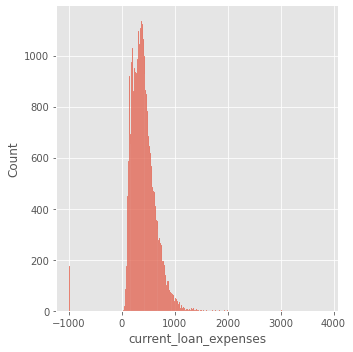

In [22]:
sns.displot(df_train['current_loan_expenses'])
plt.show()

### Relation between the number of defaults and the sanctioned loan

In [23]:
df_train['no_of_defaults'].value_counts()

0    24182
1     5818
Name: no_of_defaults, dtype: int64

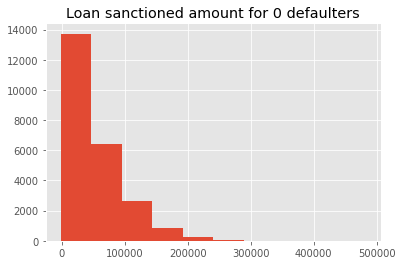

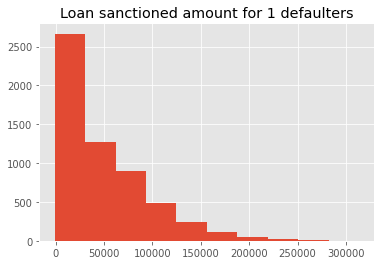

In [24]:
for defaulter in df_train['no_of_defaults'].unique():
    if isinstance(defaulter, np.int64):
        temp_df = df_train.loc[df_train['no_of_defaults'] == defaulter, 'loan_sanction_amount']
        
        plt.hist(temp_df)
        plt.title(f"Loan sanctioned amount for {defaulter} defaulters")
        plt.show()

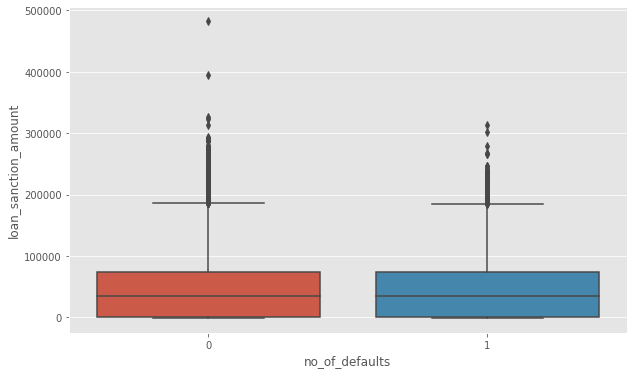

In [25]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='no_of_defaults', y='loan_sanction_amount', data=df_train)
plt.show()

### Price of property by location

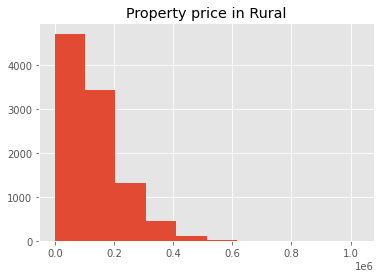

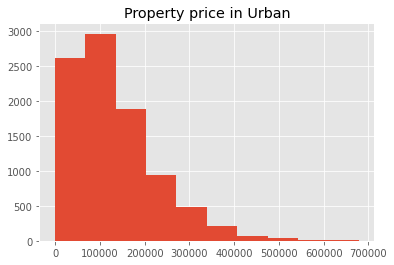

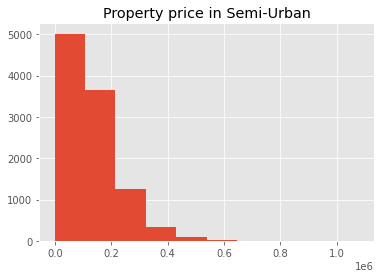

In [26]:
for location in df_train['property_location'].unique():
    if isinstance(location, str):
        temp_df = df_train.loc[df_train['property_location'] == location, 'property_price']
        
        plt.hist(temp_df)
        plt.title(f"Property price in {location}")
        plt.show()

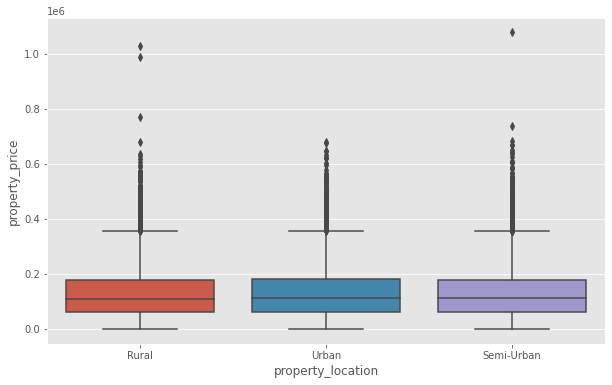

In [27]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='property_location', y='property_price', data=df_train)
plt.show()